# Random Forest Project 

The columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x:'%.2f'%x)

## Get the Data


In [3]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()
#tabela posiada kolumn 14 i 9578 rekordów
# nie ma null-i
# tylko 1 kolumna jest typu object reszta jest numeryczna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.00,0.80,0.40,0.00,1.00,1.00,1.00,1.00
int.rate,9578.00,0.12,0.03,0.06,0.10,0.12,0.14,0.22
installment,9578.00,319.09,207.07,15.67,163.77,268.95,432.76,940.14
log.annual.inc,9578.00,10.93,0.61,7.55,10.56,10.93,11.29,14.53
dti,9578.00,12.61,6.88,0.00,7.21,12.66,17.95,29.96
fico,9578.00,710.85,37.97,612.00,682.00,707.00,737.00,827.00
days.with.cr.line,9578.00,4560.77,2496.93,178.96,2820.00,4139.96,5730.00,17639.96
revol.bal,9578.00,16913.96,33756.19,0.00,3187.00,8596.00,18249.50,1207359.00
revol.util,9578.00,46.80,29.01,0.00,22.60,46.30,70.90,119.00
inq.last.6mths,9578.00,1.58,2.20,0.00,0.00,1.00,2.00,33.00


# Exploratory Data Analysis

<AxesSubplot:xlabel='fico', ylabel='Count'>

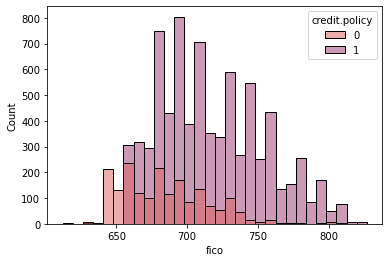

In [17]:
sns.histplot(data = df, x = 'fico', hue ='credit.policy', bins = 30, palette="flare");
# większość klientów spełnia kryterium oceny i to na duże pożyczki

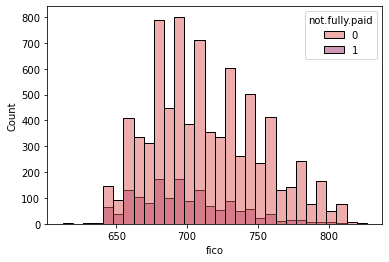

In [18]:
sns.histplot(data = df, x = 'fico', hue ='not.fully.paid', bins = 30, palette="flare");
#problemy ze spłatą mają osoby które wzięły pożyczkę 660 - 730

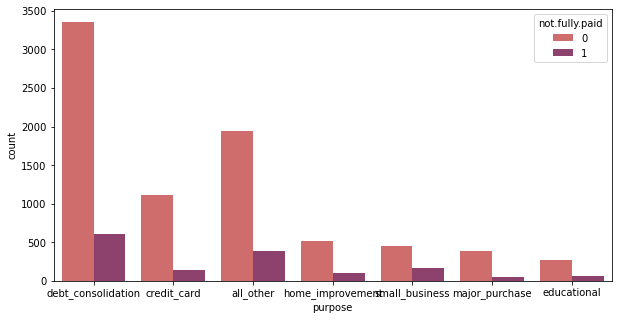

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'purpose', hue = 'not.fully.paid',  palette = "flare" );
# cel kredytu nie ma az takiego znaczenia na wynik - czy spłaci kredyt czy nie
# najwięcej kredytów udziela sie konsolidacyjnych i 'all_other' i tych też najwięcej się nie spłaca

In [19]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

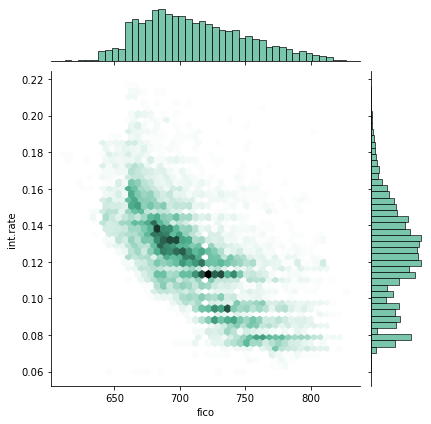

In [37]:
sns.jointplot(data = df, x = 'fico',  y = 'int.rate', color="#4CB391", kind = 'hex');
# widać że te dwie metryki mogą być ze sobą skoreloane ujemnie

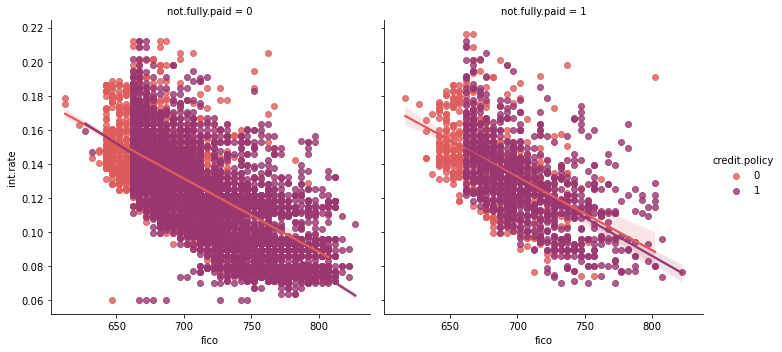

In [41]:
sns.lmplot(y = 'int.rate',x = 'fico', data = df, hue = 'credit.policy', col = 'not.fully.paid', palette = "flare");

# Setting up the Data

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

In [47]:
puprose = ['purpose']
final_df = pd.get_dummies(df,columns=puprose,drop_first=True)
final_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.12,829.10,11.35,19.48,737,5639.96,28854,52.10,0,0,0,0,0,1,0,0,0,0
1,1,0.11,228.22,11.08,14.29,707,2760.00,33623,76.70,0,0,0,0,1,0,0,0,0,0
2,1,0.14,366.86,10.37,11.63,682,4710.00,3511,25.60,1,0,0,0,0,1,0,0,0,0
3,1,0.10,162.34,11.35,8.10,712,2699.96,33667,73.20,1,0,0,0,0,1,0,0,0,0
4,1,0.14,102.92,11.30,14.97,667,4066.00,4740,39.50,0,1,0,0,1,0,0,0,0,0


In [48]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split

In [50]:
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training a Decision Tree Model

In [53]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [54]:
y_pred = dt.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2408
           1       0.20      0.21      0.20       466

    accuracy                           0.74      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.74      0.74      2874



In [57]:
print(confusion_matrix(y_test, y_pred))

[[2021  387]
 [ 370   96]]


## Training the Random Forest model

In [58]:
rtc = RandomForestClassifier()
rtc.fit(X_train, y_train)

RandomForestClassifier()

## Predictions and Evaluation

In [59]:
y_pred2 = rtc.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.27      0.01      0.02       466

    accuracy                           0.84      2874
   macro avg       0.55      0.50      0.46      2874
weighted avg       0.75      0.84      0.77      2874



In [61]:
print(confusion_matrix(y_test, y_pred2))

[[2397   11]
 [ 462    4]]
